In [3]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt
from fastai.vision import *

from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import os
import shutil
import re
import seaborn as sns



## splits indices for a folder into train, validation, and test indices with random sampling   
def split_indices(folder,seed1,seed2):    
    n = len(os.listdir(folder))
    full_set = list(range(1,n+1))

    ## train indices
    random.seed(seed1)
    train = random.sample(list(range(1,n+1)),int(.5*n))

    ## temp
    remain = list(set(full_set)-set(train))

    ## separate remaining into validation and test
    random.seed(seed2)
    valid = random.sample(remain,int(.5*len(remain)))
    test = list(set(remain)-set(valid))
    
    return(train,valid,test)

## gets file names for a particular type of trash, given indices
def get_names(waste_type,indices):
    file_names = [waste_type+str(i)+".jpg" for i in indices]
    return(file_names)    

## moves group of source files to another folder
def move_files(source_files,destination_folder):
    for file in source_files:
        shutil.move(file,destination_folder)

In [2]:
DATADIR = "dataset-resized"
SUBSETS = ["train", "valid"]
CATEGORIES = ["cardboard", "glass", "metal", "paper", "plastic", "trash"]
# os.listdir(os.path.join(os.getcwd(),"dataset-resized"))

for subset in SUBSETS:
    for waste_type in CATEGORIES:
        folder = os.path.join('data',subset,waste_type)
        if not os.path.exists(folder):
            os.makedirs(folder)
            
if not os.path.exists(os.path.join('data','test')):
    os.makedirs(os.path.join('data','test'))
    
for waste_type in CATEGORIES:
    source_folder = os.path.join('data', waste_type)
    train_ind, valid_ind, test_ind = split_indices(source_folder,1,1)
    
    train_names = get_names(waste_type,train_ind)
    train_source_files = [os.path.join(source_folder,name) for name in train_names]
    train_dest = "data/train/"+waste_type
    move_files(train_source_files,train_dest)
    
    valid_names = get_names(waste_type,valid_ind)
    valid_source_files = [os.path.join(source_folder,name) for name in valid_names]
    valid_dest = "data/valid/"+waste_type
    move_files(valid_source_files,valid_dest)
    
    test_names = get_names(waste_type,test_ind)
    test_source_files = [os.path.join(source_folder,name) for name in test_names]
    move_files(test_source_files,"data/test")

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data\\cardboard'

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data\\cardboard'

In [4]:
path = os.getcwd() +"/data"
path

'C:\\Users\\zhiji\\Documents\\Projects\\ImplementAI\\Image-Classifier/data'

In [5]:
tfms = get_transforms(do_flip=True,flip_vert=True)
data = ImageDataBunch.from_folder(path,test="test",ds_tfms=tfms,bs=16, num_workers=0)

In [5]:
data

ImageDataBunch;

Train: LabelList (1262 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: CategoryList
cardboard,cardboard,cardboard,cardboard,cardboard
Path: C:\Users\zhiji\Documents\Projects\ImplementAI\Image-Classifier\data;

Valid: LabelList (630 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: CategoryList
cardboard,cardboard,cardboard,cardboard,cardboard
Path: C:\Users\zhiji\Documents\Projects\ImplementAI\Image-Classifier\data;

Test: LabelList (635 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: EmptyLabelList
,,,,
Path: C:\Users\zhiji\Documents\Projects\ImplementAI\Image-Classifier\data

ImageDataBunch;

Train: LabelList (1262 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: CategoryList
cardboard,cardboard,cardboard,cardboard,cardboard
Path: C:\Users\zhiji\Documents\Projects\ImplementAI\Image-Classifier\data;

Valid: LabelList (630 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: CategoryList
cardboard,cardboard,cardboard,cardboard,cardboard
Path: C:\Users\zhiji\Documents\Projects\ImplementAI\Image-Classifier\data;

Test: LabelList (635 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: EmptyLabelList
,,,,
Path: C:\Users\zhiji\Documents\Projects\ImplementAI\Image-Classifier\data

In [ ]:
print(data.classes)

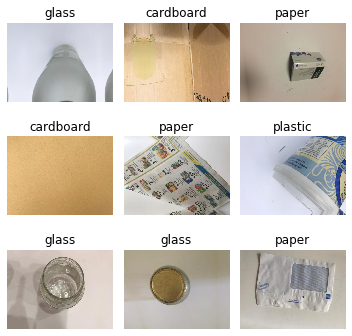

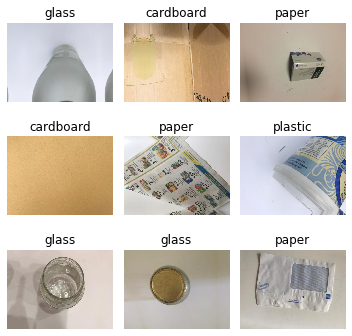

In [6]:
data.show_batch(rows=3, figsize=(5,5))

In [6]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit_one_cycle(1,1e-2)
learn.save('mini_train')

epoch,train_loss,valid_loss,accuracy,time
0,1.526040,0.725097,0.777778,01:09


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
doc(interp.plot_top_losses)
interp.plot_confusion_matrix(figsize=(20,20), dpi=60)

In [ ]:
interp.most_confused(min_val=2)

In [8]:
preds = learn.get_preds(ds_type=DatasetType.Test)

In [9]:
print(preds[0].shape)
preds[0]

torch.Size([635, 6])


tensor([[8.5926e-01, 1.0205e-05, 1.2375e-05, 2.8544e-02, 5.2504e-05, 1.1212e-01],
        [9.8971e-01, 7.5896e-08, 5.0456e-08, 1.5402e-05, 1.1272e-05, 1.0268e-02],
        [9.9706e-01, 4.9138e-08, 7.2824e-08, 3.8187e-04, 6.2040e-06, 2.5469e-03],
        ...,
        [4.2821e-02, 1.4554e-03, 3.2616e-05, 3.4612e-02, 3.7392e-04, 9.2070e-01],
        [2.3388e-02, 1.7990e-04, 1.2918e-07, 4.7742e-01, 2.0650e-05, 4.9899e-01],
        [3.0196e-01, 2.9173e-06, 2.9241e-06, 6.9765e-01, 1.2808e-04, 2.5667e-04]])

In [ ]:
## saves the index (0 to 5) of most likely (max) predicted class for each image
max_idxs = np.asarray(np.argmax(preds[0],axis=1))

In [ ]:
yhat = []
for max_idx in max_idxs:
    yhat.append(data.classes[max_idx])
yhat

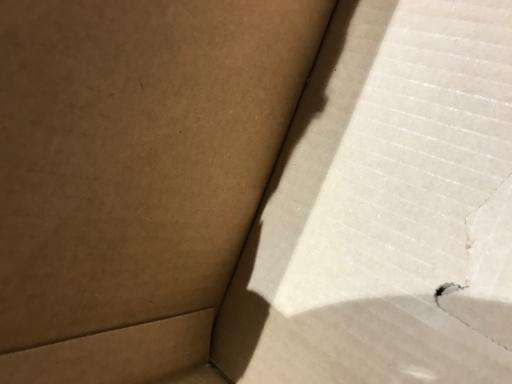

In [10]:
learn.data.test_ds[0][0]

In [ ]:
y = []

## convert POSIX paths to string first
for label_path in data.test_ds.items:
    y.append(str(label_path))
    
## then extract waste type from file path
pattern = re.compile("([a-z]+)[0-9]+")
for i in range(len(y)):
    y[i] = pattern.search(y[i]).group(1)

In [ ]:
## predicted values
print(yhat[0:5])
## actual values
print(y[0:5])

In [ ]:
cm = confusion_matrix(y,yhat)
print(cm)

In [ ]:
df_cm = pd.DataFrame(cm,CATEGORIES,CATEGORIES)

plt.figure(figsize=(10,8))
sns.heatmap(df_cm,annot=True,fmt="d",cmap="YlGnBu")

In [ ]:
correct = 0

for r in range(len(cm)):
    for c in range(len(cm)):
        if (r==c):
            correct += cm[r,c]

In [ ]:
accuracy = correct/sum(sum(cm))
accuracy

In [8]:
learn.save('modelweights')

In [7]:
learn.export('trained_model.pkl')